In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from matplotlib import cm

In [2]:
#read data
path="/lustre/ytzheng/"

Casename = 'ASTEX_cold2.6'
Casename1 = 'ASTEX_cold2.6_fxdlhf'

f = xr.open_mfdataset(path + Casename + '/' + '*N100.nc',
                      combine = 'by_coords',decode_cf = False)
f1 = xr.open_mfdataset(path + Casename1 + '/' + '*N100*.nc',
                      combine = 'by_coords',decode_cf = False)

In [3]:
nt = f['time'].size
t_hours = np.arange(nt)
z = f['z']/1000.

myfontsize = 12

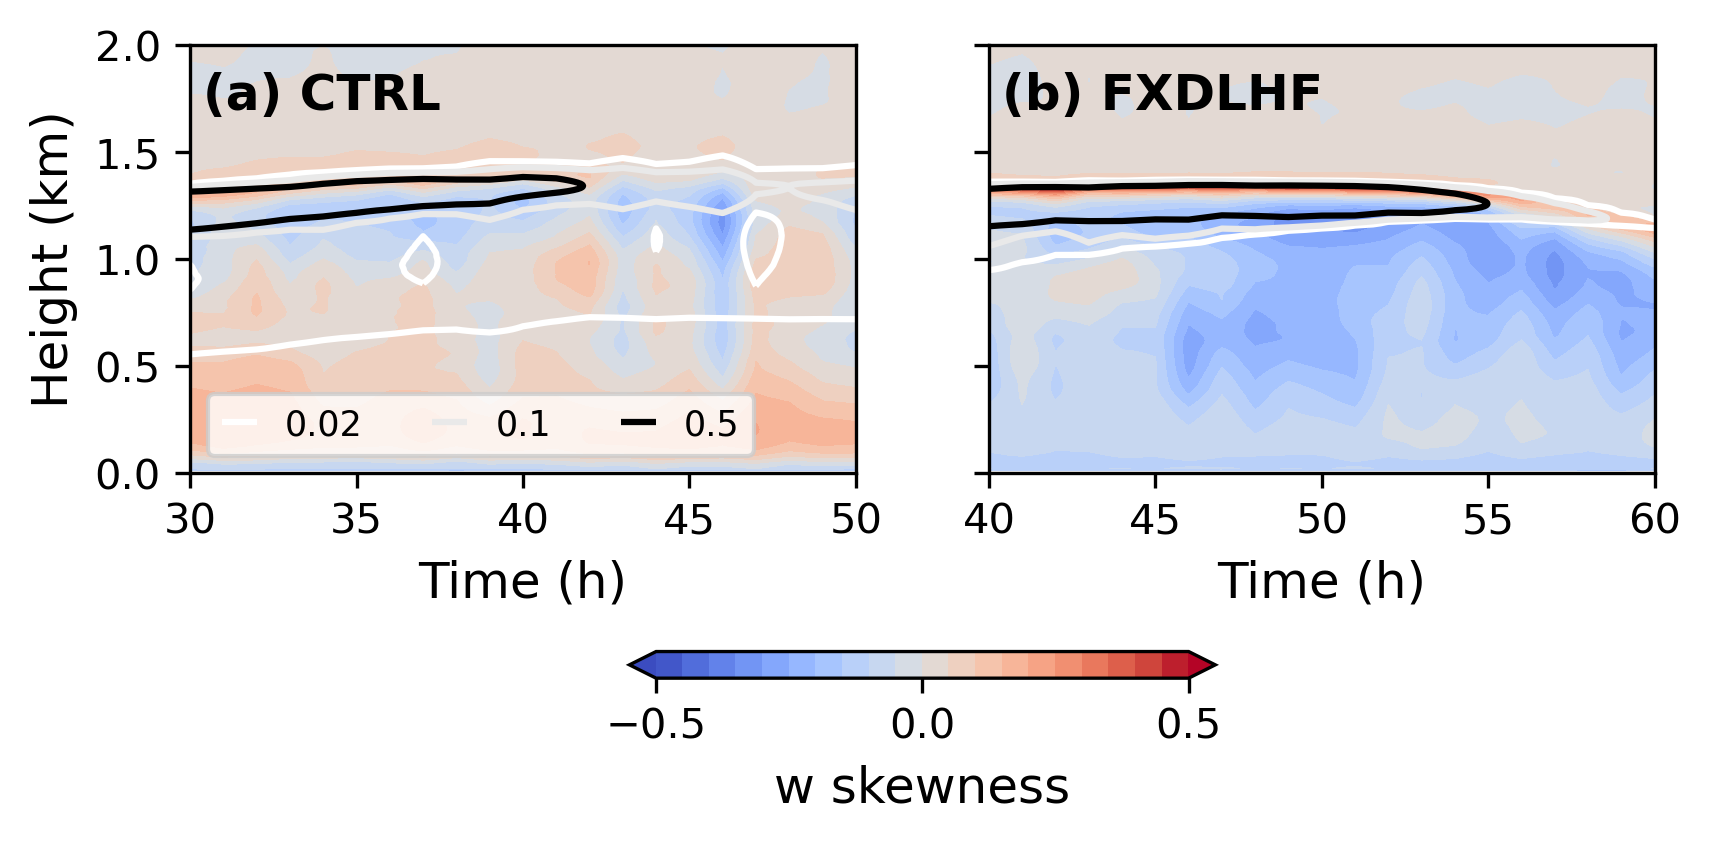

In [35]:
fig, axs = plt.subplots(1,2,figsize=[16/2.54, 8/2.54],
                        sharex = False, sharey = True,
                        dpi = 300)

mylevels = [0.02, 0.1, 0.5]
labels = ['0.02','0.1','0.5']

cmin = -0.5
cmax = 0.5

axs[0].contourf(t_hours,z,f['WSKEW'].T, cmap = cm.coolwarm, 
                levels = np.linspace(cmin, cmax, 20 + 1), 
                vmin = cmin, vmax = cmax, extend = 'both')
cs = axs[0].contour(t_hours,z,f['CLD'].T,levels = mylevels, cmap = cm.Greys)

for i in range(len(labels)):
    cs.collections[i].set_label(labels[i])

axs[0].legend(loc='lower left', fontsize=0.7*myfontsize, ncol=3,  handlelength=1)

axs[0].set_ylabel('Height (km)', fontsize=myfontsize) 
axs[0].set_xlim([30, 50])

csf = axs[1].contourf(t_hours,z,f1['WSKEW'].T, cmap = cm.coolwarm, 
                levels = np.linspace(cmin, cmax, 20 + 1), 
                      vmin = cmin, vmax = cmax, extend = 'both')
cs = axs[1].contour(t_hours,z,f1['CLD'].T,levels = mylevels, cmap = cm.Greys)
axs[1].set_xlim([40, 60])

for i in range(2):
    axs[i].set_ylim([0., 2])
    axs[i].set_xlabel('Time (h)', fontsize=myfontsize)

cbar = fig.colorbar(csf,  ax=axs, orientation='horizontal', 
                    shrink=0.4, pad=0.25, ticks=[cmin, 0, cmax])
cbar.set_label('w skewness', fontsize=myfontsize)

for i, label in enumerate(('(a) CTRL', '(b) FXDLHF')):
    axs[i].text(0.02, 0.85, label, transform=axs[i].transAxes,fontsize=myfontsize, fontweight='bold')

fig.savefig('Fig9_wskew_disspation.png', dpi=fig.dpi, bbox_inches='tight')

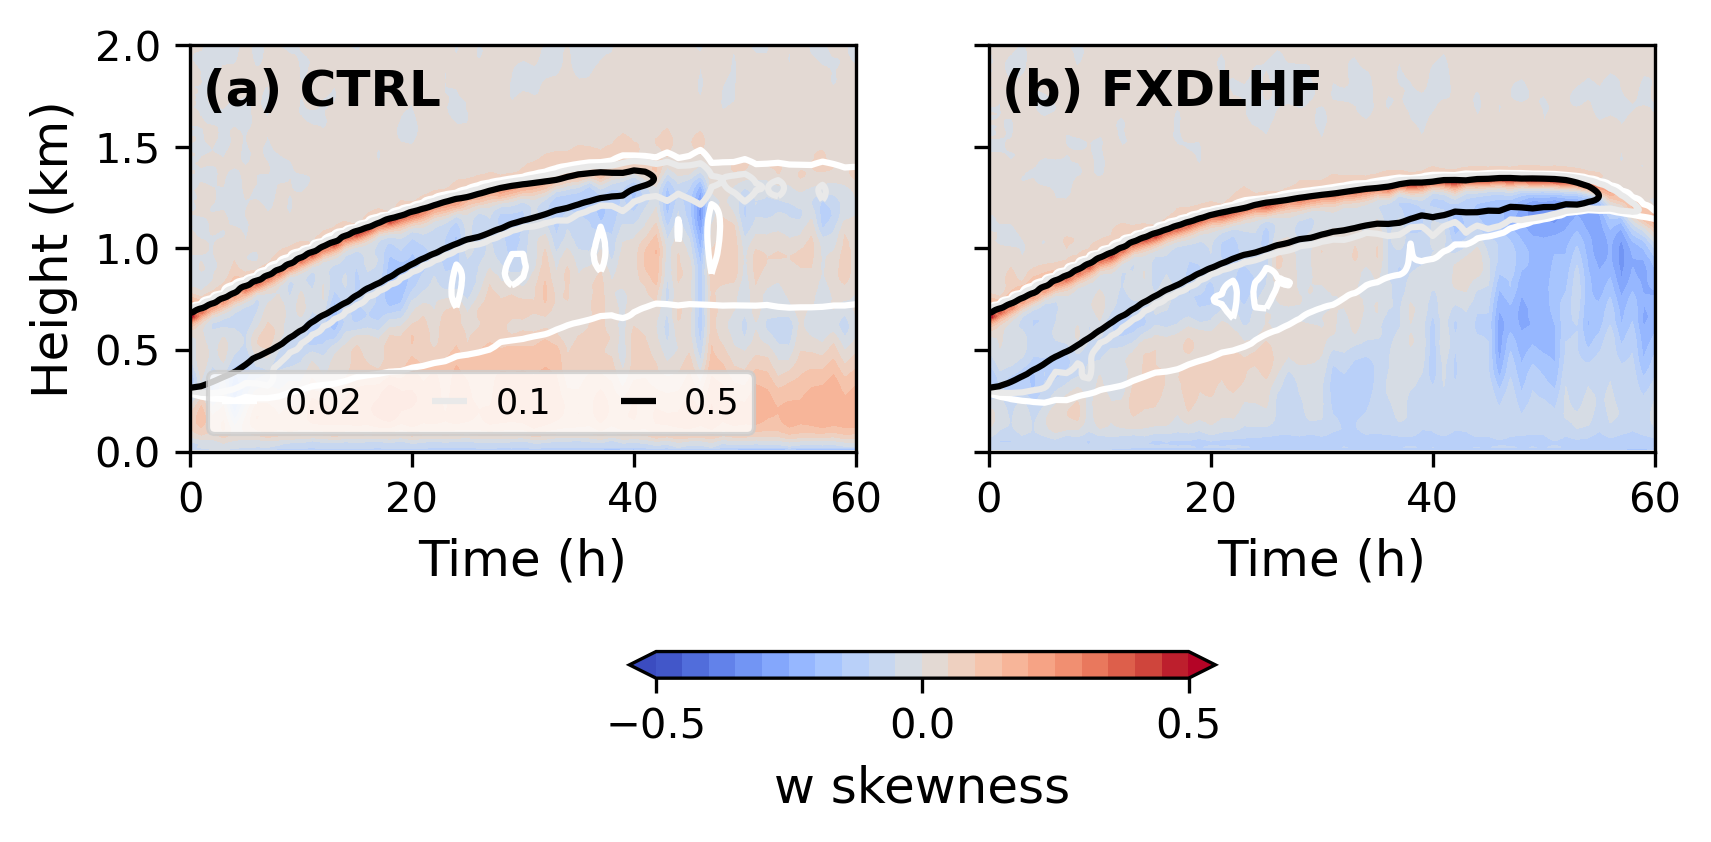

In [34]:
fig, axs = plt.subplots(1,2,figsize=[16/2.54, 8/2.54],
                        sharex = False, sharey = True,
                        dpi = 300)

mylevels = [0.02, 0.1, 0.5]
labels = ['0.02','0.1','0.5']

cmin = -0.5
cmax = 0.5

axs[0].contourf(t_hours,z,f['WSKEW'].T, cmap = cm.coolwarm, 
                levels = np.linspace(cmin, cmax, 20 + 1), 
                vmin = cmin, vmax = cmax, extend = 'both')
cs = axs[0].contour(t_hours,z,f['CLD'].T,levels = mylevels, cmap = cm.Greys)

for i in range(len(labels)):
    cs.collections[i].set_label(labels[i])

axs[0].legend(loc='lower left', fontsize=0.7*myfontsize, ncol=3,  handlelength=1)

axs[0].set_ylabel('Height (km)', fontsize=myfontsize) 
axs[0].set_xlim([0, 60])

csf = axs[1].contourf(t_hours,z,f1['WSKEW'].T, cmap = cm.coolwarm, 
                levels = np.linspace(cmin, cmax, 20 + 1), 
                      vmin = cmin, vmax = cmax, extend = 'both')
cs = axs[1].contour(t_hours,z,f1['CLD'].T,levels = mylevels, cmap = cm.Greys)
axs[1].set_xlim([0, 60])

for i in range(2):
    axs[i].set_ylim([0., 2])
    axs[i].set_xlabel('Time (h)', fontsize=myfontsize)

cbar = fig.colorbar(csf,  ax=axs, orientation='horizontal', 
                    shrink=0.4, pad=0.28, ticks=[cmin, 0, cmax])
cbar.set_label('w skewness', fontsize=myfontsize)

for i, label in enumerate(('(a) CTRL', '(b) FXDLHF')):
    axs[i].text(0.02, 0.85, label, transform=axs[i].transAxes,fontsize=myfontsize, fontweight='bold')

fig.savefig('Fig9_wskew_disspation_full_sup.png', dpi=fig.dpi, bbox_inches='tight')